# Data Analysis and Data Clustering

Ram charan Reddy Kankanala

In [71]:
import pandas as pd
import numpy as np
import json
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn import preprocessing
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA
from gensim.parsing.preprocessing import *

In [72]:
data = pd.read_csv("Xtern-DS-modified.csv")

# Data Analysis

In [ ]:
def continuous_var(x):
    sns.distplot(x)

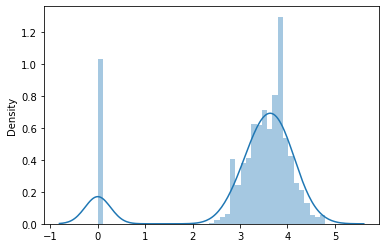

In [74]:
x = [float(i) for i in list(data['Rating'])]
continuous_var(x)

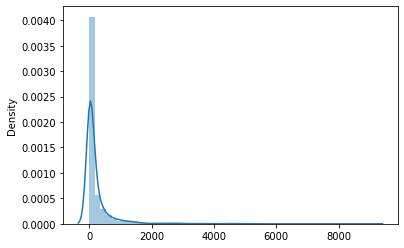

In [75]:
x = [float(i) for i in list(data['Votes'])]
continuous_var(x)

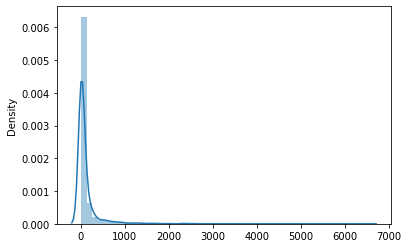

In [76]:
x = [float(i) for i in list(data['Reviews'])]
continuous_var(x)

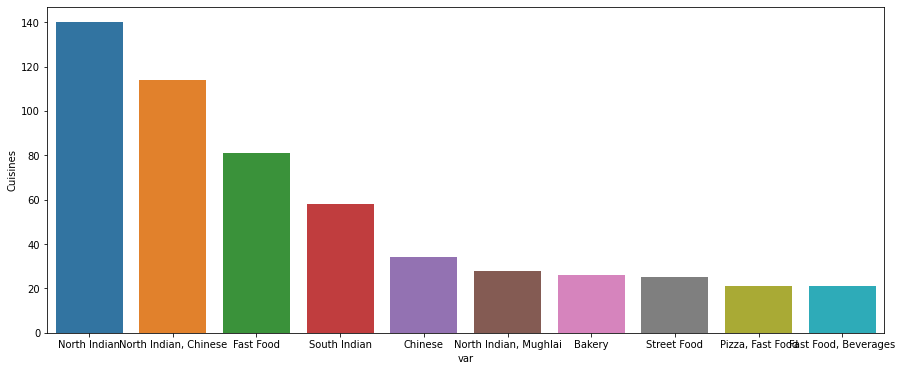

In [77]:
f, ax = plt.subplots(figsize=(15, 6))
df = pd.DataFrame(data['Cuisines'].value_counts())
df['var'] = df.index
df = df.sort_values("Cuisines",ascending=False).head(10)
sns.barplot(x='var',y="Cuisines",data =df,ax=ax)

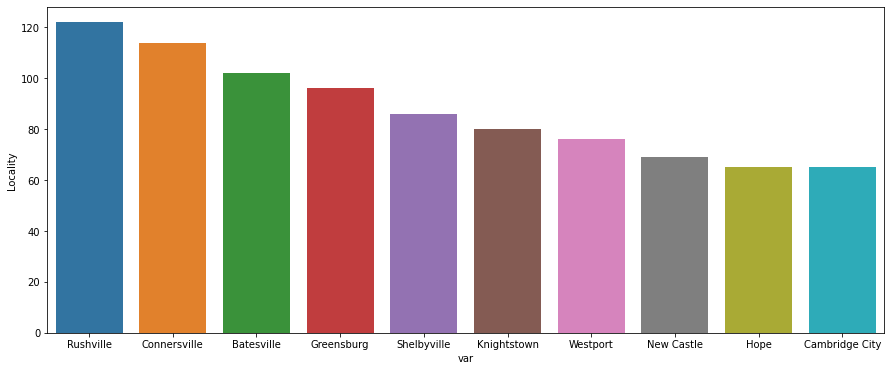

In [78]:
f, ax = plt.subplots(figsize=(15, 6))
df = pd.DataFrame(data['Locality'].value_counts())
df['var'] = df.index
df = df.sort_values("Locality",ascending=False).head(10)
sns.barplot(x='var',y="Locality",data =df,ax=ax)

In [79]:
unique_cuisines =  data.Cuisines.unique()
def word_vec(cuisines_str):
    cuisines = cuisines_str.split(",")
    tokens = [remove_stopwords(strip_multiple_whitespaces(strip_tags(strip_punctuation(strip_numeric(i))))).split(" ") 
              for i in cuisines] 
    word_vec = []
    
    for token in tokens:
        temp_vec = []
        for sub in token:
            try :
                temp_vec.append(model[sub])
            except :
                print("NA for {}".format(sub))
        if len(temp_vec)>1:    
            avg_vec = np.mean(temp_vec,axis=0)
        elif len(temp_vec)==1 :
            avg_vec = temp_vec[0]
        else :
            avg_vec = " "
        
        word_vec.append({sub :avg_vec})
            
    return word_vec
uniq_cui_vec = [word_vec(i) for i in unique_cuisines]

NA for Fast
NA for Food
NA for Rolls
NA for Burger
NA for Salad
NA for Wraps
NA for Ice
NA for Cream
NA for Desserts
NA for Italian
NA for Street
NA for Food
NA for Fast
NA for Food
NA for Mughlai
NA for North
NA for Indian
NA for Chinese
NA for Cafe
NA for Beverages
NA for South
NA for Indian
NA for North
NA for Indian
NA for Chinese
NA for Beverages
NA for Fast
NA for Food
NA for Chinese
NA for Thai
NA for Asian
NA for Mithai
NA for Street
NA for Food
NA for Fast
NA for Food
NA for North
NA for Indian
NA for Rolls
NA for Chinese
NA for Momos
NA for Mughlai
NA for North
NA for Indian
NA for Chinese
NA for Mughlai
NA for Chinese
NA for Thai
NA for Indonesian
NA for Italian
NA for Burger
NA for Fast
NA for Food
NA for Desserts
NA for Beverages
NA for Beverages
NA for Fast
NA for Food
NA for Biryani
NA for Mughlai
NA for Italian
NA for Chinese
NA for North
NA for Indian
NA for South
NA for Indian
NA for Fast
NA for Food
NA for Kerala
NA for Bihari
NA for South
NA for Indian
NA for Chines

In [80]:
pd.DataFrame(data.Locality.value_counts())

,Locality
Rushville,122
Connersville,114
Batesville,102
Greensburg,96
Shelbyville,86
Knightstown,80
Westport,76
New Castle,69
Hope,65
Cambridge City,65


In [81]:
# Considering only top count locations
data_sub =data[data.Locality.isin(['Rushville','Connersville','Batesville','Greensburg'])]

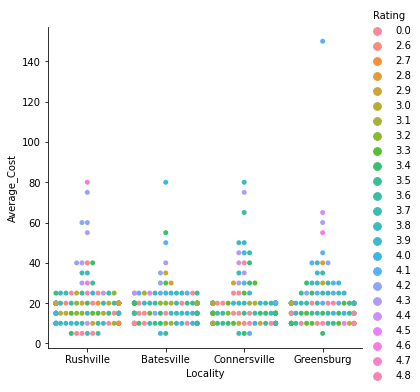

In [82]:
sns.catplot(x="Locality", y="Average_Cost", kind="swarm",hue="Rating" ,data=data_sub,ax=ax)

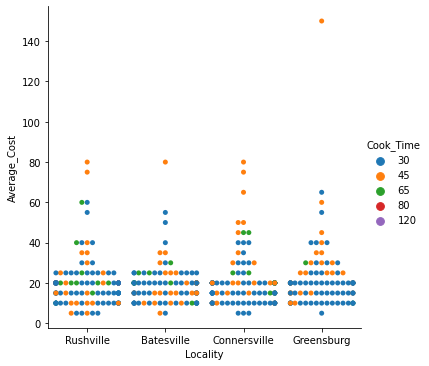

In [83]:
sns.catplot(x="Locality", y="Average_Cost", kind="swarm",hue="Cook_Time" ,data=data_sub,ax=ax)

# Clustering

In [84]:
def try_model(word):
    try :
        return model[word]
    except :
        return 'NA'

In [85]:
# Function for converting cuisines to vec
def cuisines_vec(cui_ls):
#     print(cui_ls)
    words = [i for i in cui_ls.split(",")]
#     print(words)
    words_vec = []
    for i in words:
        if len(i.split(" "))<1:
            temp_vec =  try_model(i.strip())
        else :
            temp_vec =  [try_model(j.strip()) for j in i.split(" ") if j.strip()!=""]
            temp_vec = np.mean([i for i in temp_vec if i!='NA'],axis =0)
        words_vec.append(temp_vec)
#     print((words_vec))
    return np.mean(words_vec,axis =0)

In [86]:
data_sub["cuisines_vec"] =  data_sub.apply(lambda x : cuisines_vec(x['Cuisines']),axis =1)

In [87]:
def string_to_vec(rating_text):
    ls = [j.strip() for i in rating_text.split(" ") for j in i.split("-") if len(j.strip())>1]
    words_vec = []
    for word in ls:
        try :
            words_vec.append(model[word])
        except : continue
    return np.mean(words_vec,axis =0)

In [88]:
data_sub["locality_vec"] = data_sub.apply(lambda x : string_to_vec(x['Locality']),axis =1)

In [89]:
def normaliz(col):
    x = np.array(col).reshape(-1,1)
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    return x_scaled

In [90]:
data_sub

,Unnamed: 0,Latitude,Longitude,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Cook_Time,Locality,cuisines_vec,locality_vec
13,13,39.691918,-85.441037,Beverages,5.0,0.0,3.8,184,128,45,Rushville,NaN,NaN
21,21,39.260248,-85.182680,"North Indian, Rolls",15.0,50.0,3.9,387,160,45,Batesville,NaN,NaN
22,22,39.507259,-85.328201,"North Indian, Chinese",25.0,50.0,3.0,5,2,30,Rushville,NaN,NaN
29,29,39.258314,-85.345716,"North Indian, Chinese",20.0,50.0,3.8,18,18,30,Batesville,NaN,NaN
37,37,39.404111,-85.267155,"Fast Food, South Indian",10.0,50.0,3.6,105,53,30,Batesville,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1868,2002,39.649286,-85.265100,"Street Food, Maharashtrian",10.0,50.0,0.0,0,0,30,Connersville,NaN,NaN
1871,2006,39.662689,-85.332363,"North Indian, Continental, Chinese, Juices",10.0,50.0,3.4,25,20,30,Rushville,NaN,NaN
1873,2008,39.437592,-85.191930,"North Indian, Chinese, South Indian",25.0,50.0,4.3,112,33,30,Batesville,NaN,NaN
1878,2014,39.624978,-85.189212,"North Indian, Pizza, Burger, Continental",40.0,0.0,0.0,0,0,30,Connersville,NaN,NaN


In [91]:
data_sub['avg_cost'] = normaliz(data_sub.Average_Cost)
data_sub['min_order_norm'] = normaliz(data_sub.Minimum_Order)
data_sub['agg_rate_norm'] = normaliz(data_sub.Rating)
data_sub['votes_norm'] = normaliz(data_sub.Votes)
data_sub['Reviews_norm'] = normaliz(data_sub.Reviews)
data_sub['Cook_Time_norm'] = normaliz(data_sub.Cook_Time)


In [92]:
cols_cluster = ['cuisines_vec', 'locality_vec', 'avg_cost','min_order_norm', 'agg_rate_norm', 
                'votes_norm', 'Reviews_norm','Cook_Time_norm']

In [93]:
def vec_column(columns_ls):
    ls = []
    for col in columns_ls:
        try :ls.append(col.tolist())
        except : ls.append([col])    
    
    array_vec = np.hstack(ls).tolist()
    
    return array_vec

In [94]:
data_sub['vec'] = data_sub.apply(lambda x: vec_column([x['cuisines_vec'],x['locality_vec'],
                                                             x['avg_cost'],x['min_order_norm'],x['agg_rate_norm'],
                                                             x['votes_norm'],x['Reviews_norm'],x['Cook_Time_norm']]),axis =1)

In [95]:
master_ls = []
for i in data_sub['vec']:
    master_ls.append(i) 
X_df = pd.DataFrame(master_ls).fillna(0.0)

In [96]:
X_df.to_csv("cluster_train_data.csv")

In [97]:
X = pd.read_csv("cluster_train_data.csv")

In [98]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

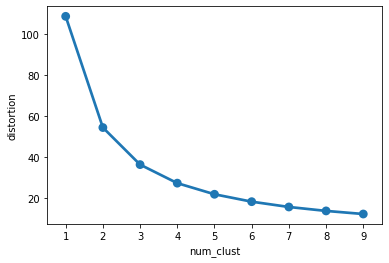

In [99]:
df = pd.DataFrame([[i,distortions[i-1]] for i in K],columns =['num_clust','distortion'])
ax = sns.pointplot(x="num_clust", y="distortion",data=df)

In [100]:
kmeans_clust = KMeans(n_clusters=4).fit(X)
cluster_labels = kmeans_clust.labels_

In [101]:
data_sub['cluster'] = cluster_labels


In [102]:
data_sub

,Unnamed: 0,Latitude,Longitude,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Cook_Time,Locality,cuisines_vec,locality_vec,avg_cost,min_order_norm,agg_rate_norm,votes_norm,Reviews_norm,Cook_Time_norm,vec,cluster
13,13,39.691918,-85.441037,Beverages,5.0,0.0,3.8,184,128,45,Rushville,NaN,NaN,0.000000,0.000000,0.791667,0.020323,0.019680,0.166667,"[nan, nan, 0.0, 0.0, 0.7916666666666666, 0.020...",2
21,21,39.260248,-85.182680,"North Indian, Rolls",15.0,50.0,3.9,387,160,45,Batesville,NaN,NaN,0.068966,0.142857,0.812500,0.042744,0.024600,0.166667,"[nan, nan, 0.06896551724137931, 0.142857142857...",2
22,22,39.507259,-85.328201,"North Indian, Chinese",25.0,50.0,3.0,5,2,30,Rushville,NaN,NaN,0.137931,0.142857,0.625000,0.000552,0.000308,0.000000,"[nan, nan, 0.13793103448275862, 0.142857142857...",2
29,29,39.258314,-85.345716,"North Indian, Chinese",20.0,50.0,3.8,18,18,30,Batesville,NaN,NaN,0.103448,0.142857,0.791667,0.001988,0.002768,0.000000,"[nan, nan, 0.10344827586206896, 0.142857142857...",2
37,37,39.404111,-85.267155,"Fast Food, South Indian",10.0,50.0,3.6,105,53,30,Batesville,NaN,NaN,0.034483,0.142857,0.750000,0.011597,0.008149,0.000000,"[nan, nan, 0.034482758620689655, 0.14285714285...",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1868,2002,39.649286,-85.265100,"Street Food, Maharashtrian",10.0,50.0,0.0,0,0,30,Connersville,NaN,NaN,0.034483,0.142857,0.000000,0.000000,0.000000,0.000000,"[nan, nan, 0.034482758620689655, 0.14285714285...",1
1871,2006,39.662689,-85.332363,"North Indian, Continental, Chinese, Juices",10.0,50.0,3.4,25,20,30,Rushville,NaN,NaN,0.034483,0.142857,0.708333,0.002761,0.003075,0.000000,"[nan, nan, 0.034482758620689655, 0.14285714285...",1
1873,2008,39.437592,-85.191930,"North Indian, Chinese, South Indian",25.0,50.0,4.3,112,33,30,Batesville,NaN,NaN,0.137931,0.142857,0.895833,0.012370,0.005074,0.000000,"[nan, nan, 0.13793103448275862, 0.142857142857...",1
1878,2014,39.624978,-85.189212,"North Indian, Pizza, Burger, Continental",40.0,0.0,0.0,0,0,30,Connersville,NaN,NaN,0.241379,0.000000,0.000000,0.000000,0.000000,0.000000,"[nan, nan, 0.24137931034482757, 0.0, 0.0, 0.0,...",1


In [103]:
pca = PCA(n_components=3)
pca.fit(X)
cluster_vis_df = pd.DataFrame(pca.transform(X),columns = ['X','Y','Z'])
cluster_vis_df['cluster'] = cluster_labels

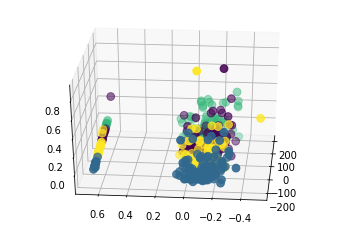

In [104]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
# plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cluster_vis_df['X'], cluster_vis_df['Y'], cluster_vis_df['Z'], c=cluster_labels, s=60)
ax.view_init(30, 185)
plt.show()